In [6]:
import os
import numpy as np
import pandas as pd

FOOD_DATA_VERSION = "2021-10-28"
DATA_PATH = os.path.join("data", FOOD_DATA_VERSION)

In [7]:
DATA_PATH

'data/2021-10-28'

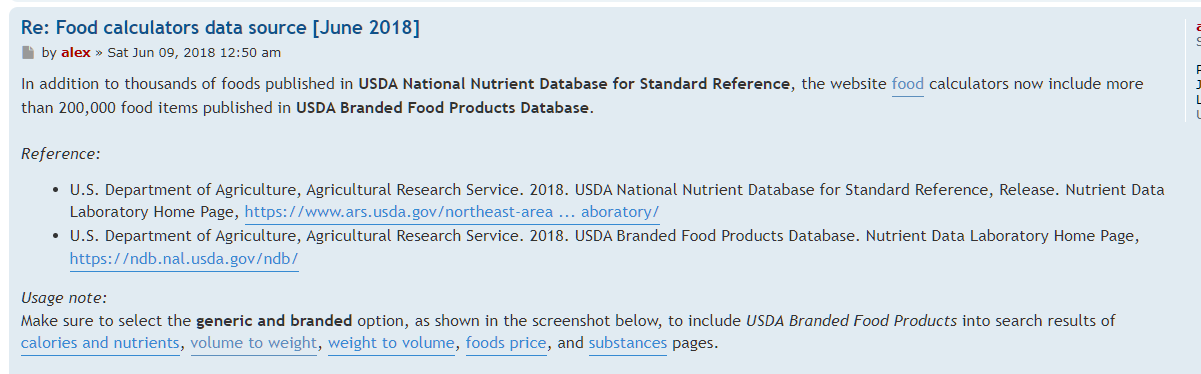

In [8]:
def get_joinner(col1, col2):
    def joinner(row):
        if pd.isna(row[col1]):
            row[col1] = row[col2].strip(", ")
        elif pd.isna(row[col2]):
            row[col1] = row[col1].strip(", ")
        else:
            row[col1] = row[col1].strip(", ") + ", " + row[col2].strip(", ")
        return row
    return joinner

In [9]:
VOLUME_UNITS = """cup
tablespoon
teaspoon
liter
milliliter
cubic inch
cubic centimeter
gallon
pint
fl oz""".split("\n")
UNITS = """

"""

def is_real_unit(possible_unit):
    possible_unit = possible_unit.lower()
    return False

def is_volume_unit(unit):
    return unit.lower() in VOLUME_UNITS

def clean_unit(unit):
    if pd.isna(unit):
        return unit
    unit = unit.strip(", ")
    #return unit
    if is_volume_unit(unit):
        return unit
    return None
    for real_unit in VOLUME_UNITS:
        if real_unit in unit:
            #print(f"Discarding extra information: {unit} becoming {real_unit}")
            return real_unit
    #print(f"{unit} wasn't a real unit")
    return None

VOLUME_UNITS

['cup',
 'tablespoon',
 'teaspoon',
 'liter',
 'milliliter',
 'cubic inch',
 'cubic centimeter',
 'gallon',
 'pint',
 'fl oz']

In [10]:
units_df = pd.read_csv(os.path.join(DATA_PATH, "measure_unit.csv"), dtype="string")
units_df.loc[units_df["name"] == "Tablespoons", "name"] = "tablespoon"
units_df

,id,name
0,1000,cup
1,1001,tablespoon
2,1002,teaspoon
3,1003,liter
4,1004,milliliter
...,...,...
117,1117,bunch
118,1118,tablespoon
119,1119,Banana
120,1120,Onion


In [11]:
food_df = pd.read_csv(os.path.join(DATA_PATH, "food.csv"), dtype="string").drop(columns=["food_category_id", "publication_date"])
food_df

,fdc_id,data_type,description
0,1105904,branded_food,WESSON Vegetable Oil 1 GAL
1,1105905,branded_food,SWANSON BROTH BEEF
2,1105906,branded_food,CAMPBELL'S SLOW KETTLE SOUP CLAM CHOWDER
3,1105907,branded_food,CAMPBELL'S SLOW KETTLE SOUP CHEESE BROCCOLI
4,1105898,experimental_food,Discrepancy between the Atwater factor predict...
...,...,...,...
1605396,2183200,branded_food,Manuka Hunters Bush Honey 250g
1605397,2183201,branded_food,Manuka Hunters Bush Honey 500g
1605398,2183202,branded_food,Manuka Hunters Bush Honey 1kg
1605399,2183203,branded_food,Rocket Fuel Sauce 300g


In [12]:
food_df["data_type"].value_counts()

branded_food                1555131
sub_sample_food               26431
sr_legacy_food                 7793
survey_fndds_food              7083
market_acquistion              5706
sample_food                    2208
agricultural_acquisition        810
foundation_food                 223
experimental_food                16
Name: data_type, dtype: Int64

In [13]:
portions_df = pd.read_csv(os.path.join(DATA_PATH, "food_portion.csv"), dtype="string").drop(columns=["min_year_acquired", "data_points", "footnote"])
portions_df

,id,fdc_id,seq_num,amount,measure_unit_id,portion_description,modifier,gram_weight
0,81549,167512,1,1.0,9999,<NA>,serving,34.0
1,81550,167513,1,1.0,9999,<NA>,serving 1 roll with icing,44.0
2,81551,167514,1,1.0,9999,<NA>,serving,28.0
3,81552,167515,1,1.0,9999,<NA>,serving,57.0
4,81553,167516,1,1.0,9999,<NA>,"waffle, square",39.0
...,...,...,...,...,...,...,...,...
56888,267791,1105295,<NA>,1.0,1119,<NA>,Peel,56.7
56889,267792,1105295,<NA>,1.0,1119,<NA>,Peel,52.8
56890,267793,1105295,<NA>,1.0,1119,<NA>,Peel,53.2
56891,267794,1105295,<NA>,1.0,1119,<NA>,Peel,51.1


In [14]:
merged_df = food_df.merge(portions_df, on="fdc_id")\
    .merge(units_df.rename(columns={"id": "measure_unit_id", "name": "unit_name"}), on="measure_unit_id")\
    .drop(columns=["measure_unit_id"])
merged_df

,fdc_id,data_type,description,id,seq_num,amount,portion_description,modifier,gram_weight,unit_name
0,167512,sr_legacy_food,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",81549,1,1.0,<NA>,serving,34.0,undetermined
1,167513,sr_legacy_food,"Pillsbury, Cinnamon Rolls with Icing, refriger...",81550,1,1.0,<NA>,serving 1 roll with icing,44.0,undetermined
2,167514,sr_legacy_food,"Kraft Foods, Shake N Bake Original Recipe, Coa...",81551,1,1.0,<NA>,serving,28.0,undetermined
3,167515,sr_legacy_food,"George Weston Bakeries, Thomas English Muffins",81552,1,1.0,<NA>,serving,57.0,undetermined
4,167516,sr_legacy_food,"Waffles, buttermilk, frozen, ready-to-heat",81553,1,1.0,<NA>,"waffle, square",39.0,undetermined
...,...,...,...,...,...,...,...,...,...,...
56888,1105295,market_acquistion,"BANANAS, SLIGHTLY RIPE",267791,<NA>,1.0,<NA>,Peel,56.7,Banana
56889,1105295,market_acquistion,"BANANAS, SLIGHTLY RIPE",267792,<NA>,1.0,<NA>,Peel,52.8,Banana
56890,1105295,market_acquistion,"BANANAS, SLIGHTLY RIPE",267793,<NA>,1.0,<NA>,Peel,53.2,Banana
56891,1105295,market_acquistion,"BANANAS, SLIGHTLY RIPE",267794,<NA>,1.0,<NA>,Peel,51.1,Banana


In [15]:
merged_df["data_type"].value_counts()

survey_fndds_food    31766
sr_legacy_food       14449
market_acquistion    10491
foundation_food        187
Name: data_type, dtype: Int64

In [16]:
# portion_description always NaN for sr_df
sr_df = merged_df[merged_df["data_type"] == "sr_legacy_food"]\
    .drop(columns=["portion_description", "unit_name"])\
    .rename(columns={"modifier": "unit_name"})
sr_df

,fdc_id,data_type,description,id,seq_num,amount,unit_name,gram_weight
0,167512,sr_legacy_food,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",81549,1,1.0,serving,34.0
1,167513,sr_legacy_food,"Pillsbury, Cinnamon Rolls with Icing, refriger...",81550,1,1.0,serving 1 roll with icing,44.0
2,167514,sr_legacy_food,"Kraft Foods, Shake N Bake Original Recipe, Coa...",81551,1,1.0,serving,28.0
3,167515,sr_legacy_food,"George Weston Bakeries, Thomas English Muffins",81552,1,1.0,serving,57.0
4,167516,sr_legacy_food,"Waffles, buttermilk, frozen, ready-to-heat",81553,1,1.0,"waffle, square",39.0
...,...,...,...,...,...,...,...,...
14444,175302,sr_legacy_food,"Game meat, elk, cooked, roasted",95993,2,1.0,"piece, cooked (yield from 1 lb raw meat, bonel...",340.0
14445,175303,sr_legacy_food,"Game meat, goat, raw",95994,1,1.0,oz,28.35
14446,175303,sr_legacy_food,"Game meat, goat, raw",95995,2,1.0,lb,453.6
14447,175304,sr_legacy_food,"Game meat, goat, cooked, roasted",95996,1,3.0,oz,85.0


In [17]:
sr_df["unit_name"].apply(clean_unit).value_counts()

cup           1692
fl oz          492
tablespoon      91
cubic inch      51
teaspoon        17
liter            3
milliliter       1
pint             1
Name: unit_name, dtype: int64

In [18]:
foundation_df = merged_df[merged_df["data_type"] == "foundation_food"]
# this is the only instance where portion_description is non-nan so modify the description to
# drop the portion_description column
foundation_df.loc[foundation_df["id"] == "119620", "description"] = "Cheese, cheddar, shredded"
foundation_df.loc[foundation_df["id"] == "119620", "portion_description"] = np.nan
# make sure there's no more non-nans, just in case data changes in future
assert len(foundation_df.dropna(subset="portion_description")) == 0
foundation_df = foundation_df.drop(columns="portion_description")
foundation_df["description"] = foundation_df["description"].apply(lambda s: s.strip())
foundation_df = foundation_df.apply(get_joinner("description", "modifier"), axis=1).drop(columns="modifier")
foundation_df

,fdc_id,data_type,description,id,seq_num,amount,gram_weight,unit_name
46286,321358,foundation_food,"Hummus, commercial",118804,1,2.0,33.9,tablespoon
46288,322892,foundation_food,"Milk, whole, 3.25% milkfat, with added vitamin D",118953,3,1.0,15.0,tablespoon
46291,323793,foundation_food,"Egg, white, dried",119069,1,1.0,7.0,tablespoon
46317,324038,foundation_food,"Sauce, salsa, ready-to-serve",119097,1,2.0,35.7,tablespoon
46320,324860,foundation_food,"Peanut butter, smooth style, with salt",119207,1,2.0,32.0,tablespoon
...,...,...,...,...,...,...,...,...
55976,790646,foundation_food,"Onions, yellow, raw, Edible",234698,1,1.0,143.0,Onion
56127,790774,foundation_food,"Bananas, overripe, raw, Peeled",234849,1,1.0,110.0,Banana
56434,790991,foundation_food,"Bananas, ripe and slightly ripe, raw, Peeled",235156,1,1.0,115.0,Banana
56585,1105073,foundation_food,"Bananas, overripe, raw, Peeled",267488,1,1.0,110.0,Banana


In [19]:
foundation_df.to_csv("foundation_foods.csv")

In [ ]:
pd.set_option("display.max_rows", 100)

In [ ]:
merged_df[merged_df["data_type"] == "survey_fndds_food"]

In [ ]:
_212["portion_description"].value_counts().index[:50]

In [ ]:
branded_df = pd.read_csv(os.path.join(DATA_PATH, "branded_food.csv"), dtype="string")[["brand_owner", "brand_name", "subbrand_name", "gtin_upc", "serving_size", "serving_size_unit", "branded_food_category", "package_weight", "discontinued_date"]]
branded_df = food_df[food_df["data_type"] == "branded_food"].join(branded_df).dropna(subset="serving_size_unit")
branded_df

In [ ]:
branded_df["discontinued_date"].value_counts()

In [1]:
from FoundationTable import FoundationTable
ft = FoundationTable()
ft_df = ft.get_df()
ft_df

,fdc_id,data_type,description,id,seq_num,g_per_ml
46286,321358,foundation_food,"Hummus, commercial",118804,1,250.635663
46288,322892,foundation_food,"Milk, whole, 3.25% milkfat, with added vitamin D",118953,3,221.801472
46291,323793,foundation_food,"Egg, white, dried",119069,1,103.507353
46317,324038,foundation_food,"Sauce, salsa, ready-to-serve",119097,1,263.943751
46320,324860,foundation_food,"Peanut butter, smooth style, with salt",119207,1,236.588236
...,...,...,...,...,...,...
47210,746784,foundation_food,"Sugars, granulated",187533,1,19.715686
55785,748278,foundation_food,"Oil, canola",192340,1,0.909000
55789,748323,foundation_food,"Oil, corn",192344,1,0.913000
55793,748366,foundation_food,"Oil, soybean",192348,1,0.913000


In [2]:
ft._dirty_df

,fdc_id,data_type,description,id,seq_num,amount,portion_description,modifier,gram_weight,equiv
46286,321358,foundation_food,"Hummus, commercial",118804,1,2.0,<NA>,<NA>,33.9,14.786765
46288,322892,foundation_food,"Milk, whole, 3.25% milkfat, with added vitamin D",118953,3,1.0,<NA>,<NA>,15.0,14.786765
46291,323793,foundation_food,"Egg, white, dried",119069,1,1.0,<NA>,<NA>,7.0,14.786765
46317,324038,foundation_food,"Sauce, salsa, ready-to-serve",119097,1,2.0,<NA>,<NA>,35.7,14.786765
46320,324860,foundation_food,"Peanut butter, smooth style, with salt",119207,1,2.0,<NA>,<NA>,32.0,14.786765
...,...,...,...,...,...,...,...,...,...,...
55976,790646,foundation_food,"Onions, yellow, raw",234698,1,1.0,<NA>,Edible,143.0,NaN
56127,790774,foundation_food,"Bananas, overripe, raw",234849,1,1.0,<NA>,Peeled,110.0,NaN
56434,790991,foundation_food,"Bananas, ripe and slightly ripe, raw",235156,1,1.0,<NA>,Peeled,115.0,NaN
56585,1105073,foundation_food,"Bananas, overripe, raw",267488,1,1.0,<NA>,Peeled,110.0,NaN
